In [2]:
# Define paths (Update these with your actual dataset paths)
import os
image_folder = "/Users/kinshuokmunjal/Documents/solarobjectdetection/image_chips_native"  # Folder containing .tif images
label_folder = "/Users/kinshuokmunjal/Documents/solarobjectdetection/labels_native"  # Folder containing .txt labels

# Count .tif images
tif_files = [f for f in os.listdir(image_folder) if f.endswith('.tif')]
num_tif_files = len(tif_files)

# Count .txt label files
txt_files = [f for f in os.listdir(label_folder) if f.endswith('.txt')]
num_txt_files = len(txt_files)

# Print results
num_tif_files, num_txt_files

tif_files = {os.path.splitext(f)[0] for f in os.listdir(image_folder) if f.endswith('.tif')}
txt_files = {os.path.splitext(f)[0] for f in os.listdir(label_folder) if f.endswith('.txt')}

# Find mismatches
tif_without_txt = tif_files - txt_files  # .tif images without corresponding .txt labels
txt_without_tif = txt_files - tif_files  # .txt labels without corresponding .tif images

# Display results
mismatch_data = {
    "Images without Labels (.tif but no .txt)": list(tif_without_txt),
    "Labels without Images (.txt but no .tif)": list(txt_without_tif)
}



In [3]:

print(mismatch_data["Images without Labels (.tif but no .txt)"])

[]


In [4]:
#remove the files that do not have labels
for file in mismatch_data["Images without Labels (.tif but no .txt)"]:
    os.remove(image_folder + "/" + file + ".tif")

In [5]:
#check if the files have been removed
tif_files = {os.path.splitext(f)[0] for f in os.listdir(image_folder) if f.endswith('.tif')}
txt_files = {os.path.splitext(f)[0] for f in os.listdir(label_folder) if f.endswith('.txt')}
mismatch_data = {
    "Images without Labels (.tif but no .txt)": list(tif_files - txt_files),
    "Labels without Images (.txt but no .tif)": list(txt_files - tif_files)
}

In [10]:
print(mismatch_data["Images without Labels (.tif but no .txt)"])

[]


Matplotlib is building the font cache; this may take a moment.


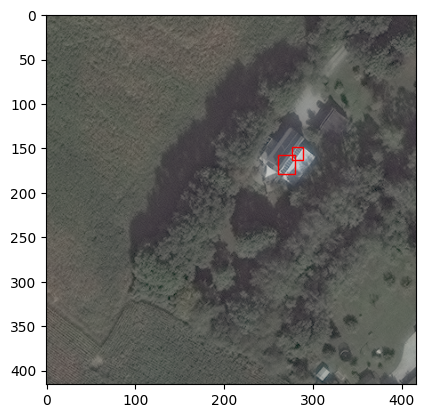

In [6]:
#HELP to visualize the images and labels images are in .tif and labels are in .txt use pillow to visualize the images
from PIL import Image
import matplotlib.pyplot as plt

# Load an random image from the folder pick random
#load a different image each time
import random
random_image = "solarpanels_native_2__x0_233_y0_8903_dxdy_416"
image_path = os.path.join(image_folder, random_image + '.tif')
image = Image.open(image_path)
plt.imshow(image)

# Load the corresponding label and mark the bounding boxes
label_path = os.path.join(label_folder, random_image + '.txt')
with open(label_path, 'r') as file:
    for line in file:
        class_id, x_center, y_center, width, height = map(float, line.split())
        x_center *= image.width
        y_center *= image.height
        width *= image.width
        height *= image.height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        rect = plt.Rectangle((x_min, y_min), width, height, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)




=== Solar Panels per Image ===
solarpanels_native_1__x0_1816_y0_6688_dxdy_416.txt: 15 solar panels
solarpanels_native_2__x0_2777_y0_5191_dxdy_416.txt: 37 solar panels
solarpanels_native_1__x0_13167_y0_14045_dxdy_416.txt: 6 solar panels
solarpanels_native_2__x0_233_y0_8903_dxdy_416.txt: 2 solar panels
solarpanels_native_1__x0_9119_y0_10931_dxdy_416.txt: 6 solar panels
solarpanels_native_1__x0_7762_y0_12212_dxdy_416.txt: 3 solar panels
solarpanels_native_2__x0_0_y0_953_dxdy_416.txt: 6 solar panels
solarpanels_native_2__x0_572_y0_10490_dxdy_416.txt: 42 solar panels
solarpanels_native_3__x0_4936_y0_12449_dxdy_416.txt: 9 solar panels
solarpanels_native_2__x0_2542_y0_4926_dxdy_416.txt: 15 solar panels
solarpanels_native_3__x0_1080_y0_7916_dxdy_416.txt: 11 solar panels
solarpanels_native_2__x0_2820_y0_5289_dxdy_416.txt: 34 solar panels
solarpanels_native_3__x0_10444_y0_10752_dxdy_416.txt: 3 solar panels
solarpanels_native_1__x0_8499_y0_8005_dxdy_416.txt: 9 solar panels
solarpanels_native_1__

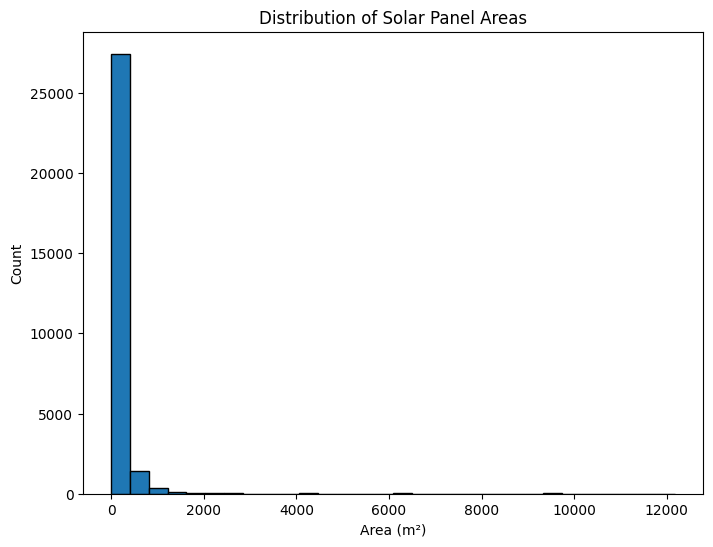

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# List all .txt label files
label_files = [f for f in os.listdir(label_folder) if f.endswith('.txt')]

# Initialize statistics
total_solar_panels = 0
label_counts = []  # Stores the number of labels per image
panel_areas = []  # Stores area of panels in square meters

resolution = 0.31  # 31 cm per pixel
image_size = 416  # Image size (YOLO format assumes square images)

# Process each label file
print("\n=== Solar Panels per Image ===")
for label_file in label_files:
    label_path = os.path.join(label_folder, label_file)
    
    with open(label_path, "r") as f:
        lines = f.readlines()
    
    num_panels = len(lines)  # Count number of solar panels in the image
    total_solar_panels += num_panels
    label_counts.append(num_panels)

    print(f"{label_file}: {num_panels} solar panels")  # Print per-image count

    # Compute areas
    for line in lines:
        parts = line.strip().split()
        _, _, _, width, height = map(float, parts)  # YOLO format: class x_center y_center width height
        panel_area = (width * image_size * resolution) * (height * image_size * resolution)  # Convert to m²
        panel_areas.append(panel_area)

# Compute statistics
mean_area = np.mean(panel_areas)
std_area = np.std(panel_areas)

# Prepare data for display
dataset_stats = {
    "Total Solar Panel Instances": total_solar_panels,
    "Mean Area (m²)": mean_area,
    "Std Dev of Area (m²)": std_area,
    "Min Area (m²)": np.min(panel_areas),
    "Max Area (m²)": np.max(panel_areas),
}

# Convert to DataFrame for easy viewing & saving
dataset_stats_df = pd.DataFrame([dataset_stats])

# Print dataset statistics
print("\n=== Dataset Statistics ===")
print(dataset_stats_df)

# Save dataset statistics to CSV file
dataset_stats_df.to_csv("solar_panel_statistics.csv", index=False)
print("\n✅ Statistics saved to 'solar_panel_statistics.csv'")

# Plot histogram of solar panel areas
plt.figure(figsize=(8, 6))
plt.hist(panel_areas, bins=30, edgecolor="black")
plt.xlabel("Area (m²)")
plt.ylabel("Count")
plt.title("Distribution of Solar Panel Areas")
plt.show()


In [42]:
import os
import random
import shutil

# 🛠 UPDATE THESE PATHS
image_dir = "/Users/kinshuokmunjal/Documents/solarobjectdetection/image_chips_native"  # Folder containing all images
label_dir = "/Users/kinshuokmunjal/Documents/solarobjectdetection/labels_native"  # Folder containing YOLO .txt labels
output_dir = "/Users/kinshuokmunjal/Documents/solarobjectdetection/dataset"  # Output dataset directory

# Create correct folder structure
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_dir, "images", split), exist_ok=True)
    os.makedirs(os.path.join(output_dir, "labels", split), exist_ok=True)

# Get all image files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.tif'))])
random.shuffle(image_files)

# Define split ratios
train_split = int(0.8 * len(image_files))
val_split = int(0.9 * len(image_files))

train_images = image_files[:train_split]
val_images = image_files[train_split:val_split]
test_images = image_files[val_split:]

# Function to move files
def move_files(files, source_img, source_lbl, dest_img, dest_lbl):
    for file in files:
        img_path = os.path.join(source_img, file)
        lbl_path = os.path.join(source_lbl, os.path.splitext(file)[0] + ".txt")

        if os.path.exists(img_path):
            shutil.copy(img_path, os.path.join(dest_img, file))

        if os.path.exists(lbl_path):
            shutil.copy(lbl_path, os.path.join(dest_lbl, os.path.splitext(file)[0] + ".txt"))

# Move images and labels to correct folders
move_files(train_images, image_dir, label_dir, os.path.join(output_dir, "images/train"), os.path.join(output_dir, "labels/train"))
move_files(val_images, image_dir, label_dir, os.path.join(output_dir, "images/val"), os.path.join(output_dir, "labels/val"))
move_files(test_images, image_dir, label_dir, os.path.join(output_dir, "images/test"), os.path.join(output_dir, "labels/test"))

print("\n✅ Dataset split completed. Check '/Users/kinshuokmunjal/Documents/solarobjectdetection/dataset/' for train/val/test folders.")



✅ Dataset split completed. Check '/Users/kinshuokmunjal/Documents/solarobjectdetection/dataset/' for train/val/test folders.


In [44]:
#give length of the files in the dataset
import os

# 🛠 UPDATE THIS PAT
dataset_dir = "/Users/kinshuokmunjal/Documents/solarobjectdetection/dataset"  # Path to the dataset directory

# Count number of files in each split
split_counts = {}
for split in ["train", "val", "test"]:
    image_files = os.listdir(os.path.join(dataset_dir, "images", split))
    label_files = os.listdir(os.path.join(dataset_dir, "labels", split))
    split_counts[split] = len(image_files), len(label_files)
    
split_counts

{'train': (2033, 2033), 'val': (254, 254), 'test': (255, 255)}

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model (Nano version is best for CPU)
model = YOLO("yolov8n.pt")

# Train YOLO on CPU (macOS does not support CUDA)
model.train(
    data="/Users/kinshuokmunjal/Documents/solarobjectdetection/dataset.yaml",  # Path to dataset.yaml
    epochs=50,  # Number of training iterations
    batch=4,   # Reduce batch size for CPU efficiency
    imgsz=416,  # Image size
    device="cpu"  # Force CPU (required for macOS)
)


New https://pypi.org/project/ultralytics/8.3.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.74 🚀 Python-3.12.6 torch-2.6.0 MPS (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/kinshuokmunjal/Documents/solarobjectdetection/dataset.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=416, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

train: Scanning /Users/kinshuokmunjal/Documents/solarobjectdetection/dataset/labels/train... 2033 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2033/2033 [00:00<00:00, 3950.29it/s]

train: New cache created: /Users/kinshuokmunjal/Documents/solarobjectdetection/dataset/labels/train.cache



val: Scanning /Users/kinshuokmunjal/Documents/solarobjectdetection/dataset/labels/val... 254 images, 0 backgrounds, 0 corrupt: 100%|██████████| 254/254 [00:00<00:00, 3727.79it/s]

val: New cache created: /Users/kinshuokmunjal/Documents/solarobjectdetection/dataset/labels/val.cache
Plotting labels to runs/detect/train6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/509 [00:13<?, ?it/s]


KeyboardInterrupt: 

In [18]:
import os

# Path to your YOLO label files
  # Update this path

# Check each .txt file
for label_file in os.listdir(label_folder):
    if label_file.endswith('.txt'):
        label_path = os.path.join(label_folder, label_file)

        with open(label_path, "r") as f:
            lines = f.readlines()

        # Check if any line contains class ID greater than 0
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])  # First value in YOLO format is class ID

            if class_id > 0:  # Only class 0 should exist
                print(f"❌ {label_file} contains invalid class ID: {class_id}")


❌ solarpanels_native_2__x0_5426_y0_6012_dxdy_416.txt contains invalid class ID: 1
❌ solarpanels_native_2__x0_5426_y0_6012_dxdy_416.txt contains invalid class ID: 1
❌ solarpanels_native_1__x0_1398_y0_10006_dxdy_416.txt contains invalid class ID: 2
❌ solarpanels_native_2__x0_7013_y0_9828_dxdy_416.txt contains invalid class ID: 1
❌ solarpanels_native_2__x0_7013_y0_9828_dxdy_416.txt contains invalid class ID: 1
❌ solarpanels_native_3__x0_5909_y0_8922_dxdy_416.txt contains invalid class ID: 2
❌ solarpanels_native_2__x0_9310_y0_3032_dxdy_416.txt contains invalid class ID: 1
❌ solarpanels_native_1__x0_1501_y0_10325_dxdy_416.txt contains invalid class ID: 2
❌ solarpanels_native_1__x0_318_y0_7394_dxdy_416.txt contains invalid class ID: 2
❌ solarpanels_native_1__x0_9658_y0_10999_dxdy_416.txt contains invalid class ID: 2
❌ solarpanels_native_1__x0_8232_y0_7817_dxdy_416.txt contains invalid class ID: 2
❌ solarpanels_native_2__x0_6876_y0_9926_dxdy_416.txt contains invalid class ID: 1
❌ solarpanels_

Found 222 images with multiple label classes.
- solarpanels_native_2__x0_5426_y0_6012_dxdy_416.txt
- solarpanels_native_1__x0_1398_y0_10006_dxdy_416.txt
- solarpanels_native_2__x0_7013_y0_9828_dxdy_416.txt
- solarpanels_native_3__x0_5909_y0_8922_dxdy_416.txt
- solarpanels_native_2__x0_9310_y0_3032_dxdy_416.txt
- solarpanels_native_1__x0_1501_y0_10325_dxdy_416.txt
- solarpanels_native_1__x0_318_y0_7394_dxdy_416.txt
- solarpanels_native_1__x0_9658_y0_10999_dxdy_416.txt
- solarpanels_native_1__x0_8232_y0_7817_dxdy_416.txt
- solarpanels_native_2__x0_6876_y0_9926_dxdy_416.txt
- solarpanels_native_1__x0_9783_y0_10933_dxdy_416.txt
- solarpanels_native_3__x0_9407_y0_14792_dxdy_416.txt
- solarpanels_native_2__x0_4837_y0_12375_dxdy_416.txt
- solarpanels_native_2__x0_9542_y0_3448_dxdy_416.txt
- solarpanels_native_2__x0_4882_y0_12418_dxdy_416.txt
- solarpanels_native_3__x0_9322_y0_9896_dxdy_416.txt
- solarpanels_native_3__x0_9060_y0_13006_dxdy_416.txt
- solarpanels_native_1__x0_9891_y0_11010_dxdy_

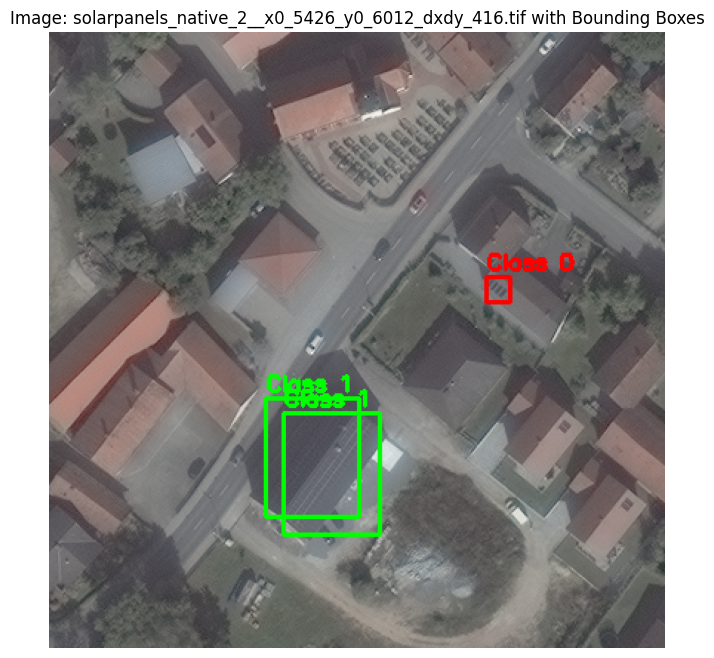

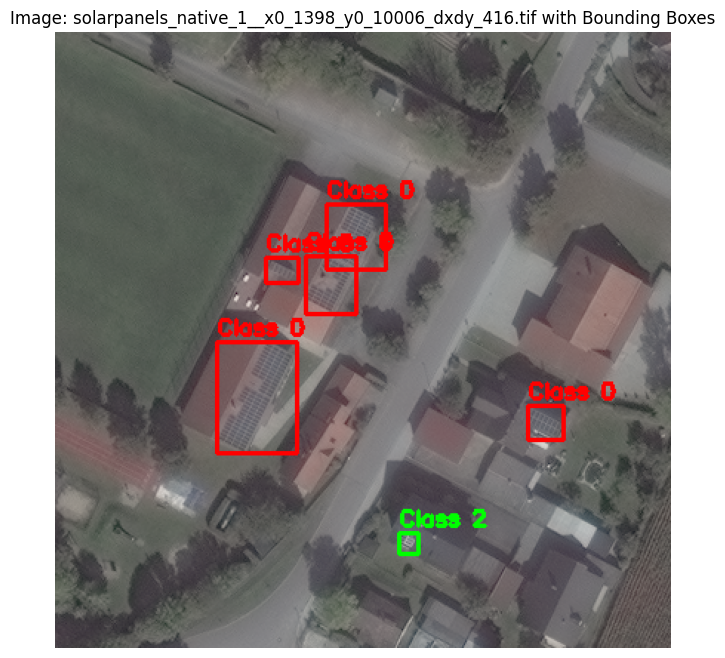

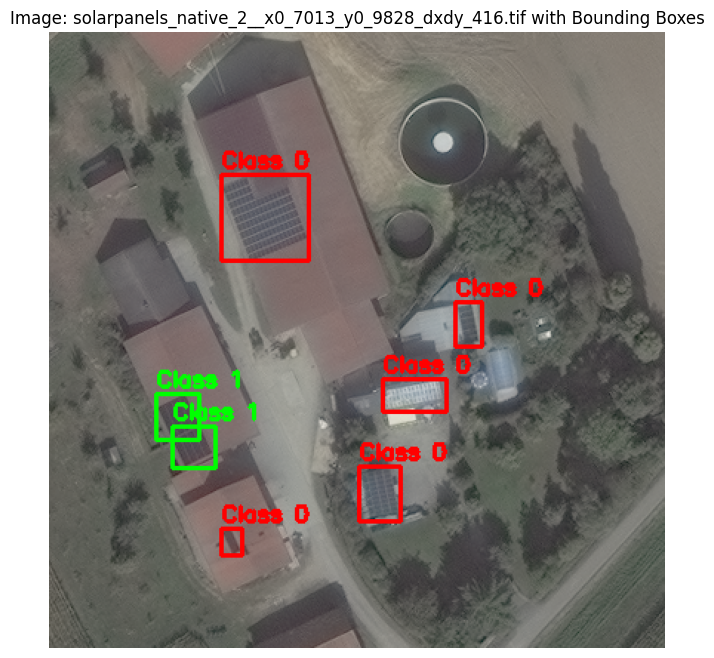

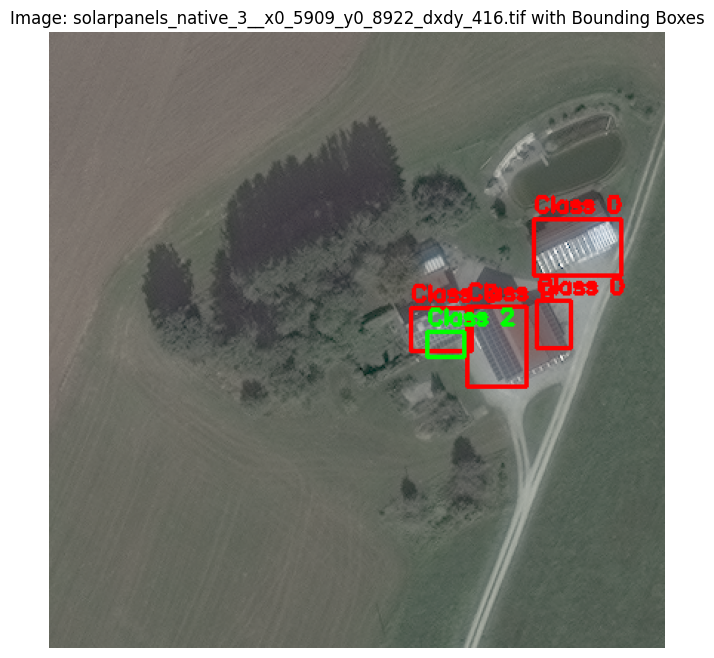

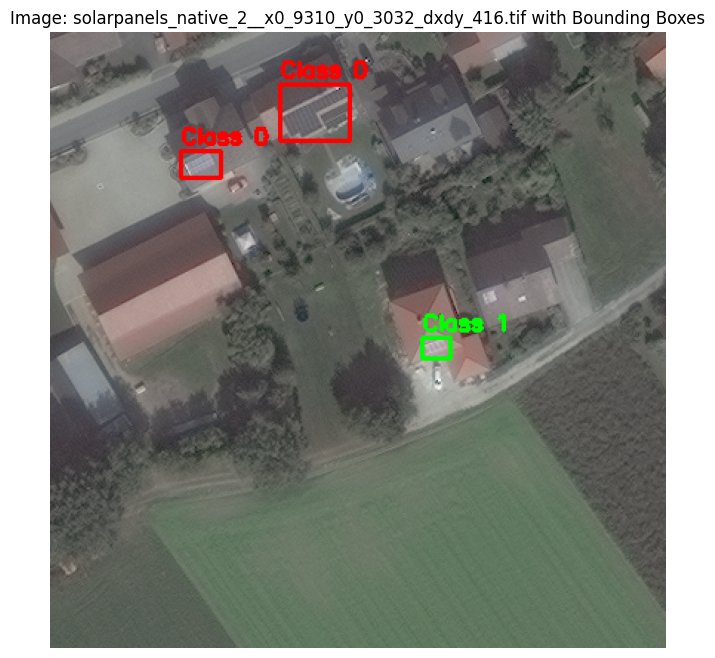

In [20]:
import cv2
files_with_multiple_classes = []

# Process each label file
for label_file in os.listdir(label_folder):
    if label_file.endswith('.txt'):
        label_path = os.path.join(label_folder, label_file)

        with open(label_path, "r") as f:
            lines = f.readlines()

        # Collect unique class IDs in this label file
        class_ids = set(int(line.strip().split()[0]) for line in lines)

        # If there is more than one unique class in this file, store it
        if len(class_ids) > 1:
            files_with_multiple_classes.append(label_file)

# Display the result
print(f"Found {len(files_with_multiple_classes)} images with multiple label classes.")
for file in files_with_multiple_classes:
    print(f"- {file}")

# Function to plot the image with bounding boxes
def plot_image_with_boxes(image_path, label_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    img_height, img_width = image.shape[:2]

    # Read the label file
    with open(label_path, "r") as file:
        lines = file.readlines()

    # Draw bounding boxes
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center = float(parts[1]) * img_width
        y_center = float(parts[2]) * img_height
        width = float(parts[3]) * img_width
        height = float(parts[4]) * img_height

        # Convert YOLO format to (x_min, y_min, x_max, y_max)
        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        x_max = int(x_center + width / 2)
        y_max = int(y_center + height / 2)

        # Choose different colors for different classes
        color = (255, 0, 0) if class_id == 0 else (0, 255, 0)  # Blue for 0, Green for others

        # Draw the rectangle and label
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
        cv2.putText(image, f"Class {class_id}", (x_min, y_min - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Image: {os.path.basename(image_path)} with Bounding Boxes")
    plt.show()

# Show the first 5 images with multiple labels
for label_file in files_with_multiple_classes[:5]:
    image_file = os.path.splitext(label_file)[0] + ".tif"  # Change extension if needed (e.g., .jpg)
    image_path = os.path.join(image_folder, image_file)
    label_path = os.path.join(label_folder, label_file)

    if os.path.exists(image_path):
        plot_image_with_boxes(image_path, label_path)
    else:
        print(f"⚠️ Image file not found: {image_file}")

In [25]:
from shapely.geometry import box
import numpy as np

def yolo_to_bbox(yolo_bbox, img_size=416):
    """
    Converts YOLO format bbox to (x_min, y_min, x_max, y_max)
    
    Args:
    yolo_bbox: (x_center, y_center, width, height) - normalized
    img_size: Image size (assumes square)
    
    Returns:
    (x_min, y_min, x_max, y_max) in pixel coordinates
    """
    x_c, y_c, w, h = yolo_bbox
    x_min = (x_c - w / 2) * img_size
    y_min = (y_c - h / 2) * img_size
    x_max = (x_c + w / 2) * img_size
    y_max = (y_c + h / 2) * img_size
    return x_min, y_min, x_max, y_max

def compute_iou(bbox1, bbox2):
    """
    Computes IoU (Intersection over Union) between two bounding boxes.
    
    Args:
    bbox1: (x_min, y_min, x_max, y_max)
    bbox2: (x_min, y_min, x_max, y_max)
    
    Returns:
    IoU score (float)
    """
    # Convert bounding boxes to shapely polygons
    box1 = box(*bbox1)
    box2 = box(*bbox2)

    # Compute intersection and union
    intersection = box1.intersection(box2).area
    union = box1.union(box2).area

    return intersection / union if union > 0 else 0  # Avoid division by zero

# Example test case
bbox1_yolo = (0.5, 0.5, 0.2, 0.2)  # Example YOLO format bbox
bbox2_yolo = (0.55, 0.55, 0.2, 0.2)

bbox1 = yolo_to_bbox(bbox1_yolo)
bbox2 = yolo_to_bbox(bbox2_yolo)

iou_score = compute_iou(bbox1, bbox2)
print(f"IoU Score: {iou_score:.4f}")


IoU Score: 0.3913


In [36]:
import supervision.detection.core as sd
print(dir(sd))
  # This will show all functions and classes in the module


ModuleNotFoundError: No module named 'xml.etree.ElementTree'

In [41]:
import os

# Path to label directory
label_dir = "/Users/kinshuokmunjal/Documents/solarobjectdetection/dataset/train/labels"  # Update path if needed

# Find unique class labels
unique_labels = set()

for label_file in os.listdir(label_dir):
    if label_file.endswith(".txt"):
        with open(os.path.join(label_dir, label_file), "r") as f:
            for line in f.readlines():
                class_id = line.split()[0]  # Get first value (class ID)
                unique_labels.add(class_id)

print(f"Unique class labels found: {unique_labels}")


Unique class labels found: {'0', '2', '1'}
